In [567]:
%matplotlib notebook

import matplotlib.pyplot as plt #import matplotlib library
from matplotlib.animation import FuncAnimation # import animations for matplotlib

from datetime import datetime # datetime library

import pandas as pd # pandas library

from sqlalchemy.dialects.postgresql import JSON # Allows SQLAlchemy to parse the json from the postgresql db
from sqlalchemy import ( # Sqlaclhemy desired content
    MetaData,
    Table, Column,
    Integer, Numeric, String,
    DateTime, 
    ForeignKey, 
    Select,
    create_engine) 
from sqlalchemy.orm import sessionmaker # Sqlalchemy ORM desired content
from sqlalchemy.orm.exc import NoResultFound # Sqlalchemy NoResultFound

from time import sleep # sleep

In [568]:
 metadata = MetaData() # Set SQLAlchemy MetaData

In [569]:
# Obtain database password
dbpass = ''
with open('../lunacapture/.dbpass') as f:
    dbpass = f.readlines()

In [570]:
# Create the SQLAlchemy Engine
engine = create_engine('postgresql://postgres:' + dbpass[0] + '@localhost:5432/test_cpp')

In [571]:
# Create the connection to the engine
connection = engine.connect()

In [572]:
# Create a SQLAlchemy Session
Session = sessionmaker(bind = engine)
session = Session()

In [573]:
# Build a SQLAlchemy model of the PostgreSQL database
test_conn = Table('test_conn', metadata,
                   Column('id', Integer(), primary_key=True),
                   Column('robot_json', JSON),
                   Column('created_at', DateTime(timezone=False), default=datetime.now, onupdate=datetime.now))

In [574]:
# List of possible data points to observe
data_record_names = [
    'boom',
    'drive_encoder_left',
    'drive_encoder_right',
    'dump',
    'epoch_time',
    'fork',
    'loc_angle',
    'loc_x',
    'loc_y',
    'power_boom',
    'power_dump',
    'power_fork',
    'power_left',
    'power_right',
    'power_spin',
    'power_stick',
    'power_tilt',
    'power_tool',
    'spin',
    'state_state',
    'stick',
    'tilt',
    'vibe'
]

In [575]:
sub_plot_0_name = data_record_names[10]
sub_plot_1_name = data_record_names[3]

In [576]:
print("Sub Plot 1: ", sub_plot_0_name, "\nSub Plot 2: ", sub_plot_1_name)

Sub Plot 1:  power_dump 
Sub Plot 2:  dump


In [577]:
# Create an empty pandas dataframe with columns to match
df = pd.DataFrame()

df['id'] = ''
df[sub_plot_0_name] = ''
df[sub_plot_1_name] = ''
df['datetime_database'] = ''

In [578]:
def retrieve_data(show_print):
    # Prepare to select from the test_conn table
    results = None
    
    if df.empty:
        s = test_conn.select()
        rp = connection.execute(s)
        results = rp.fetchall()
        # To Do: Too many nests. Factor into separate functions
        if show_print:
            for result in results:
                print(result[0], ", ", result[1][sub_plot_0_name], ", ", result[1][sub_plot_1_name], ", ", result[2])
                
    else:
        results = session.query(test_conn).order_by(test_conn.c.id.desc()).first()
        
        # To Do: Search in reverse until a familiar id is found, then stop and collect only the ones missing
        # Possible code below
        # stop_at_id = df.iloc[-1]['id']
        # results = session.query(test_conn).order_by(test_conn.c.id.desc()).filter_by(test_conn.id > stop_at_id)
        
        if show_print:
            print(results[0], ", ", results[1][sub_plot_0_name], ", ", results[1][sub_plot_1_name], ", ", results[2])

       
    if (results == None):
        raise SystemExit("The postgresql database is empty.")

    # If the dataframe is empty, add this first result 
    if (len(df) == 0):
        # To Do: Lift below into its own function, so as not to repeat
        for result in results:
            df.loc[len(df)] = [result[0], result[1][sub_plot_0_name], result[1][sub_plot_1_name], result[2]]    
    
    # To Do: Change so that all results that are not yet in dataframe are added
    # up to the last one added
    
    # Otherwise, only add if the id in the result is different from the last id in dataframe 
    elif (results[0] != df.iloc[-1]['id']):
        df.loc[len(df)] = [results[0], results[1][sub_plot_0_name], results[1][sub_plot_1_name], results[2]]    

In [579]:
retrieve_data(True)

4633 ,  0.0 ,  0.0 ,  2023-05-10 13:26:11.708926
4634 ,  0.0 ,  0.0 ,  2023-05-10 13:26:12.214032
4635 ,  0.0 ,  0.0 ,  2023-05-10 13:26:12.718779
4636 ,  0.0 ,  0.0 ,  2023-05-10 13:26:13.223771
4637 ,  -0.8700000047683716 ,  -1.159999966621399 ,  2023-05-10 13:26:13.728181
4638 ,  0.23999999463558197 ,  -2.799999952316284 ,  2023-05-10 13:26:14.233418
4639 ,  0.009999999776482582 ,  -1.0099999904632568 ,  2023-05-10 13:26:14.739058
4640 ,  0.3100000023841858 ,  1.3700000047683716 ,  2023-05-10 13:26:15.244063
4641 ,  0.7099999785423279 ,  6.619999885559082 ,  2023-05-10 13:26:15.749569
4642 ,  -0.5199999809265137 ,  6.650000095367432 ,  2023-05-10 13:26:16.255035
4643 ,  -0.07000000029802322 ,  3.5899999141693115 ,  2023-05-10 13:26:16.760360
4644 ,  0.9200000166893005 ,  6.849999904632568 ,  2023-05-10 13:26:17.265499
4645 ,  0.03999999910593033 ,  11.949999809265137 ,  2023-05-10 13:26:17.770836
4646 ,  0.9900000095367432 ,  16.5 ,  2023-05-10 13:26:18.276146
4647 ,  1.0 ,  24.0100

In [580]:
def update_graph_length(graph_initial_cell, graph_x_length):
    if (len(df) > graph_x_length):
        graph_initial_cell = len(df) - graph_x_length
    return graph_initial_cell

<IPython.core.display.Javascript object>


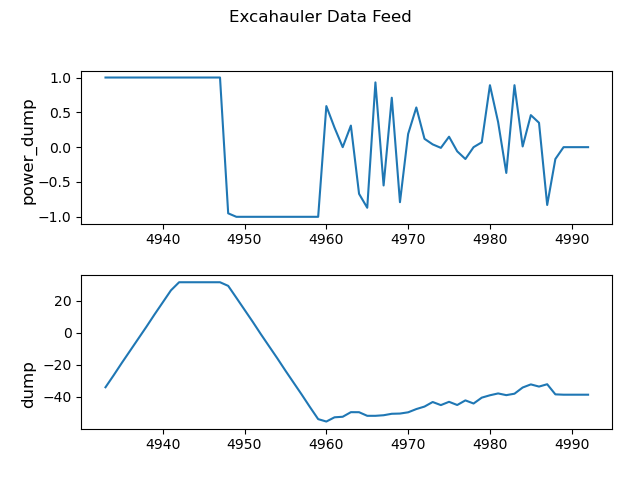

In [617]:
# fig = plt.figure()
# ax = plt.subplots(2)
# ax = fig.add_subplot(211)
# ax = fig.add_subplot(212)
# plt.ion()

fig, axs = plt.subplots(2)
fig.suptitle("Excahauler Data Feed")
plt.ion()

fig.show()
fig.canvas.draw()

In [614]:
# Initialize the graph starting point at 0
graph_initial_cell = 0

# Set the intended graph length
graph_x_length = 60

In [620]:
# Endless while loop to display graph
while True:
    retrieve_data(False)
    axs[0].clear()
    axs[1].clear()
    graph_initial_cell = update_graph_length(graph_initial_cell, graph_x_length)
    axs[0].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_0_name])
    axs[1].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_1_name])
    
    axs[0].set_title(sub_plot_0_name, rotation=90, x=-0.1, y=0.1)
    axs[1].set_title(sub_plot_1_name, rotation=90, x=-0.1, y=0.1)
    fig.tight_layout(pad=2.0)
    
    fig.canvas.draw()
    
    sleep(500/1000)
    # clear_output(wait=True)

KeyboardInterrupt: 